In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("loan_data_set.csv")

df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [19]:
df = df.drop(["Loan_ID"],axis=1)

In [20]:
df.shape #satır,sütun sayısı

(614, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode().iloc[0]) #gender'ın modunu al ve eksik verileri ilk elemanla doldur

In [24]:
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode().iloc[0])

In [25]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode().iloc[0]).astype(int)

In [26]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode().iloc[0]).astype(int)

In [27]:
df["Dependents"] = df["Dependents"].replace(["0","1","2","3+"],["0","1","2","3"])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode().iloc[0])

In [28]:
df["CoapplicantIncome"] = df["CoapplicantIncome"].astype(int)

In [29]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mode().iloc[0]).astype(int)

In [30]:
(df["Married"] == -1).sum()

0

In [32]:
df["Married"] = df["Married"].replace(-1,df["Married"].mode().iloc[0])

In [33]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             614 non-null    object
 1   Married            611 non-null    object
 2   Dependents         614 non-null    object
 3   Education          614 non-null    object
 4   Self_Employed      614 non-null    object
 5   ApplicantIncome    614 non-null    int64 
 6   CoapplicantIncome  614 non-null    int32 
 7   LoanAmount         614 non-null    int32 
 8   Loan_Amount_Term   614 non-null    int32 
 9   Credit_History     614 non-null    int32 
 10  Property_Area      614 non-null    object
 11  Loan_Status        614 non-null    object
dtypes: int32(4), int64(1), object(7)
memory usage: 48.1+ KB


In [35]:
df.isnull().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
# Kategorik verileri sayısal verilere dönüştürme
def cat_to_num(df, c_var):
    for i in c_var:
        uniqes_value = df[i].unique()
        if len(uniqes_value) == 2:
            df[i].replace(uniqes_value, [0, 1], inplace=True)
        else:
            df[i] = pd.Categorical(df[i]).codes  # 3 veya daha fazla benzersiz değer varsa otomatik kodlama

    # "Property_Area" için özel kodlama
    uniqes_value = df["Property_Area"].unique()
    df["Property_Area"].replace(uniqes_value, [0, 1, 2], inplace=True)  # 3 farklı kategori olduğu için



In [37]:
c_variables = ["Gender","Married","Education","Education","Self_Employed","Loan_Status"]
cat_to_num(df,c_var=c_variables)

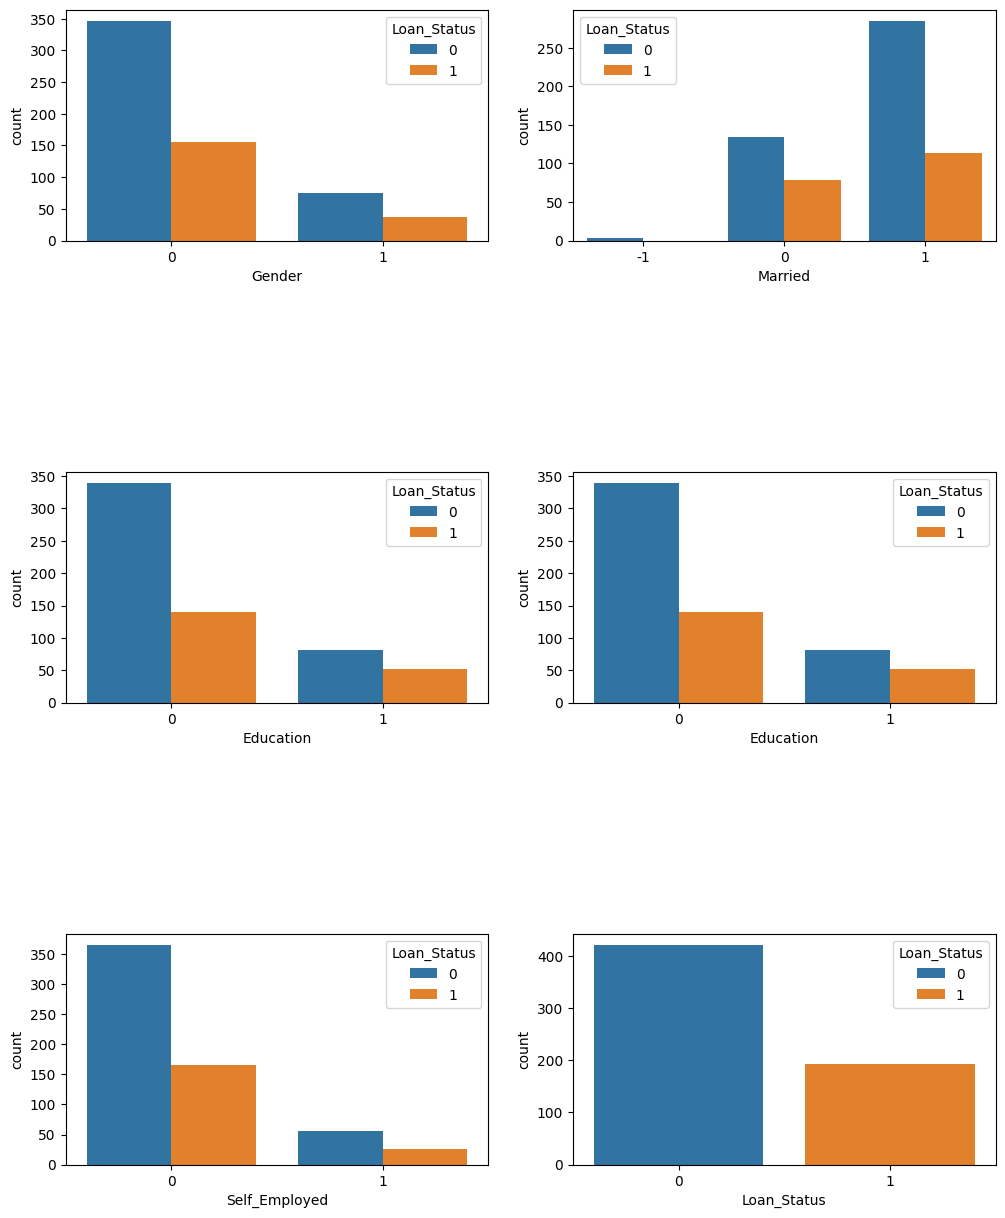

In [38]:
fig, ax = plt.subplots(3,2,figsize=(12,15))
for index, cat_col in enumerate(c_variables):
    row,col = index // 2, index %2
    sns.countplot(x=cat_col,data=df,hue="Loan_Status",ax=ax[row,col])
plt.subplots_adjust(hspace=1) # dikey boşluklar

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000          614.00000  614.000000
mean       5403.459283         1621.24430  145.465798
std        6109.041673         2926.24876   84.180967
min         150.000000            0.00000    9.000000
25%        2877.500000            0.00000  100.250000
50%        3812.500000         1188.50000  125.000000
75%        5795.000000         2297.25000  164.750000
max       81000.000000        41667.00000  700.000000


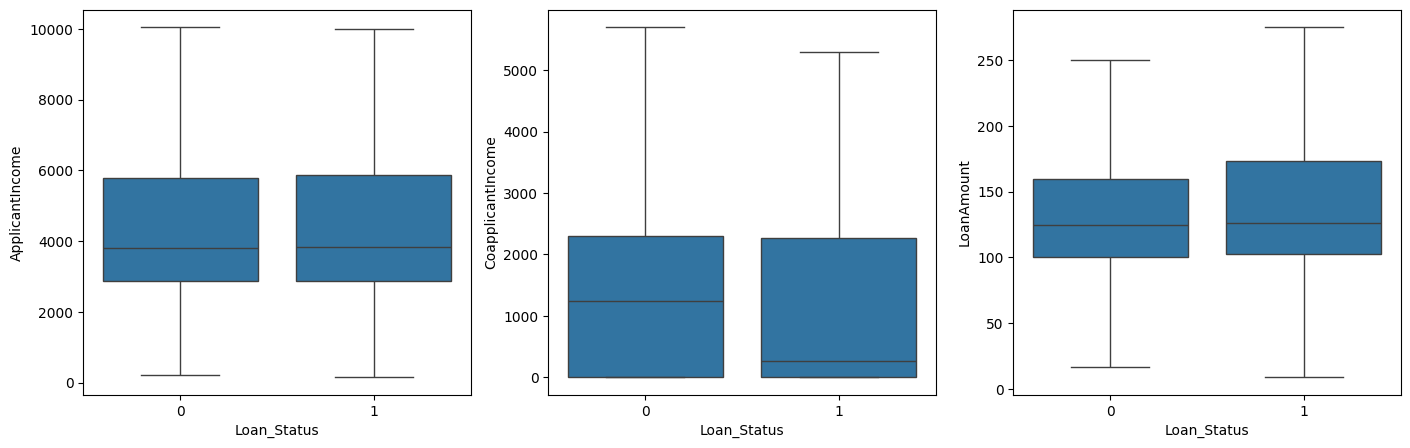

In [40]:
numerical_columns = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

fig,axes = plt.subplots(1,3,figsize=(17,5))

for idx, cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,showfliers=False,x="Loan_Status",ax = axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [41]:
X = df.drop(["Loan_Status"],axis=1)
y = df["Loan_Status"]

In [44]:
print(X.shape)
print(y.shape)

(614, 11)
(614,)


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [48]:
#standartlaştırma
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [54]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=35) #depth ağaç derinliği, samples leaf ağacın yaprağındaki min örnek sayısı
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [57]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
roc_score = roc_auc_score(y_test,y_pred)

print(f"accuracy score: {accuracy*100:0.2f}%")
print(f"roc-auc score: {roc_score*100:0.2f}%")

accuracy score: 78.86%
roc-auc score: 70.31%


In [ ]:
#roc score = 0.5 rastgele sınıflandırma yapıyormuş gibi kabul edilir
#roc score = 0.7-0.8 makul bir sınıflandırma yapmıştır
#roc score = 0.8-0.9 iyi bir sınıflandırma yapmıştır
#roc dcore = 0.9-1.0 mükemmek bir sınıflsndırma yspmıştır